In [4]:
import pandas as pd

comments = pd.read_csv("comments_names_cleaned.csv")
posts = pd.read_csv("posts_names_cleaned.csv")

comments.rename(columns = {"body": "contents"}, inplace = True)

In [3]:
import string

def keyword_match(text: str, keyword: str) -> bool:
    """Match keyword to whole words or whole phrases in text.
    """

    text = text.lower()
    keyword = keyword.lower()

    punctuation = [i for i in string.punctuation] + ["’"]
    punctuation = "".join(punctuation)

    text = text.translate(str.maketrans(punctuation, " "*len(punctuation))) # replace punctuation with spaces

    # print(text)
    def text_subtract(text: str, keyword: str):
        """If keyword is in text, remove it on its first appearance.
        """
        if keyword in text:
            l = text.find(keyword)
            text_list = list(text)
            text_list[l:l+len(keyword)] = ""
            text_subtracted = "".join(text_list)
            return text_subtracted
        else:
            return False

    text_subtracted = text_subtract(text, keyword)
    if text_subtracted:
        if len(text_subtracted.split()) == len(text.split()) - len(keyword.split()):
            return True
    return False

In [57]:
import string

names = ["ranni", "renna", "snow witch", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "malenia", "pot boy", "fia", "patches", "jorge", "yakul", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "alexander", "irina", "latenna", "bloody wolf", "raging wolf"]

mismatches = []
for index, row in comments.iterrows():
    # matched = False
    contents =row.contents

    for name in names:
        matched = False
        if keyword_match(contents, name):
            matched = True
            break
    if matched is False:

        mismatches.append(index)

# mismatches
comments.drop(index=mismatches, inplace=True)
print(f"{len(mismatches)} comments removed.")


19349 comments removed.


In [106]:
df = pd.DataFrame(num_appearance, columns=DATES, index=CHARACTERS)
df.to_csv("num_appearance.csv")

In [4]:
import pandas as pd

df = pd.read_csv("num_appearance.csv", index_col=0)
df.head()



,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
ranni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32491.0,34061.0,35736.0,37162.0,38594.0,39856.0,39856.0,39856.0,39856.0,39856.0
nepheli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4351.0,4513.0,4693.0,4934.0,5091.0,5249.0,5249.0,5249.0,5249.0,5249.0
blaidd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11169.0,11629.0,12131.0,12546.0,12913.0,13307.0,13307.0,13307.0,13307.0,13307.0
millicent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3190.0,3379.0,3600.0,3778.0,4030.0,4297.0,4297.0,4297.0,4297.0,4297.0
melina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12725.0,13190.0,13652.0,14018.0,14421.0,14806.0,14806.0,14806.0,14806.0,14806.0


Drawing with seaborn

In [ ]:
# use bar_char_race to make bar chart race

import bar_chart_race as bcr
import pandas as pd

bcr.bar_chart_race(
    df = df.tail(10),

    filename = "num_appearance.mp4",

    figsize = (26, 15),

    orientation = "h",

    sort = "desc",

    n_bars = 10,

    # smoothness of the animation
    steps_per_period = 45,

    # time period in ms for each row
    period_length = 1500,

    # custom set of colors
    # colors=[
    #     '#6ECBCE', '#FF2243', '#FFC33D', '#CE9673', '#FFA0FF', '#6501E5', '#F79522', '#699AF8', '#34718E', '#00DBCD',
    #     '#00A3FF', '#F8A737', '#56BD5B', '#D40CE5', '#6936F9', '#FF317B', '#0000F3', '#FFA0A0', '#31FF83', '#0556F3'
    # ],

    title = {
        "label": "Number of appearances",
        "size": 52,
        "weight": "bold",
        "pad": 40,
    },

    period_label={
        "x": 0.95, "y": 0.15,
        "ha": "right", "va": "center",
        "size": 72,
        "weight": "semibold",
    },

    bar_label_size = 27,

    tick_label_size = 27,

    bar_kwargs={"alpha": .99, "lw": 0},

)

In [5]:
# convert a wide df to long df, so that we can conveniently visualize it
import pandas as pd

df = pd.read_csv("num_appearance.csv")
long_df = df.unstack().reset_index()
long_df.columns = ["date", "character", "num_appearance"]

def capitalize_first_letter(text: str) -> str:
    """Capitalize first letter of text.
    """
    return text.title()

long_df.character = long_df.character.apply(capitalize_first_letter)

long_df.head()

,date,character,num_appearance
0,2019-06-08,Ranni,0.0
1,2019-06-08,Nepheli,0.0
2,2019-06-08,Blaidd,0.0
3,2019-06-08,Millicent,0.0
4,2019-06-08,Melina,0.0


In [75]:
def convert_malenia_to_valkyrie(character: str) -> str:
    """Convert Malenia to Valkyrie.
    """
    if character == "Malenia":
        return "Valkyrie"
    else:
        return character

long_df.character = long_df.character.apply(convert_malenia_to_valkyrie)

In [66]:
# resize all profile pics to be the same size
from PIL import Image
import os.path
import glob

def resize_profile_pic(file: str, width: int = 128, height: int = 128) -> None:
    """Resize profile pic to size.
    """
    path = f"profile_pics/{file}.png"
    img = Image.open(path)
    img = img.resize((width, height), Image.BILINEAR)
    img.save(path)

CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]

for character in CHARACTERS:
    resize_profile_pic(character)


/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_52866/308114459.py:11: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((width, height), Image.BILINEAR)


In [ ]:
import seaborn as sns

CHARACTERS = long_df.character.unique()
NUM_ROWS = 10 # number of rows in the plot
colors = sns.pallet("mako" ,n_colors=len(CHARACTERS))

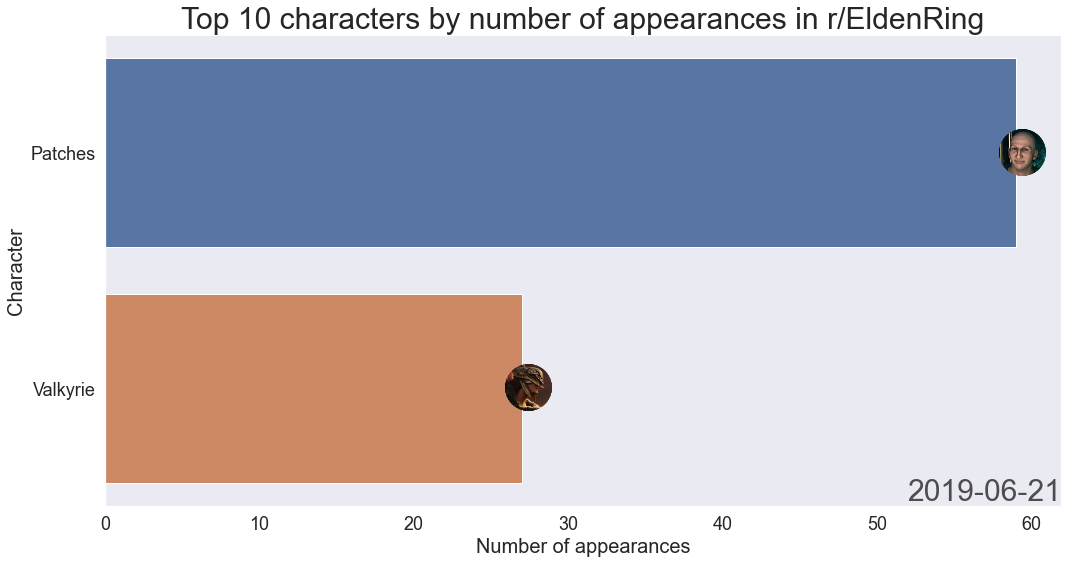

In [157]:
import seaborn as sns
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]
NUM_ROWS = 10 # number of rows in the plot

fig, ax = plt.subplots(figsize=(15, 8))

sns.set_style("dark")

def draw_barchart(date):
    dff = (long_df.query("date == @date & num_appearance > 0")
       .sort_values("num_appearance", ascending=False)
       .head(NUM_ROWS))

    ax.clear()

    # print date
    ax.text(1, 0, date, fontsize=30, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, alpha=0.8)

    g = sns.barplot(data = dff, x = "num_appearance", y = "character")

    # show image at the end of bar
    for i in range(len(dff)):
        character = dff.iloc[i]["character"]
        img = plt.imread(f"profile_pics/{character}.png")
        
        rect = ax.patches[i]
        x = rect.get_width()
        y = rect.get_y()
        height = rect.get_height()
        im = OffsetImage(img, zoom=0.36)
        ab = AnnotationBbox(im, (x+0.5*height, y+0.5*height), xycoords='data', pad=0.5, frameon=False)
        ax.add_artist(ab)
    

    plt.title("Top 10 characters by number of appearances in r/EldenRing", fontsize = 30)
    plt.xlabel("Number of appearances", fontsize=20)
    plt.ylabel("Character", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    # plt.show(g)
    # plt.close()

current_date = "2019-06-21"
draw_barchart(current_date)



RuntimeError: Requested MovieWriter (avconv) not available

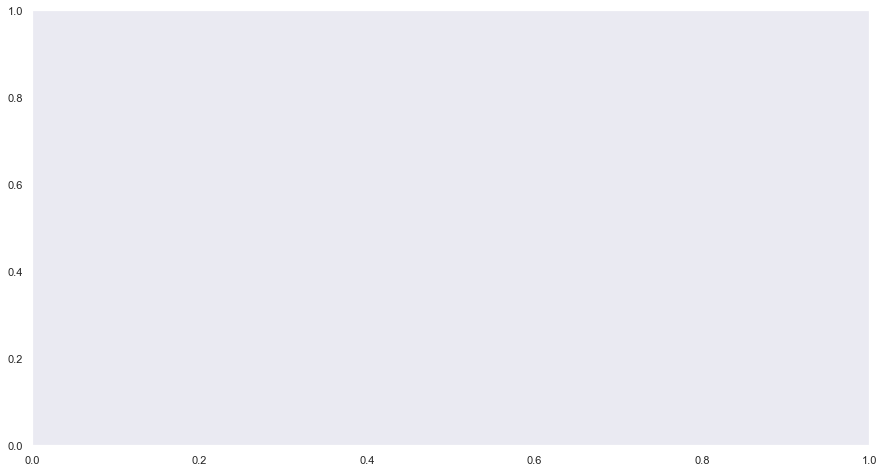

In [187]:
import seaborn as sns
from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128 # increase animation memory limit in MB
matplotlib.rcParams['animation.writer'] = 'avconv'

fig, ax = plt.subplots(figsize=(15, 8))

dates = long_df.date.unique()
# weeks = [dates[i] for i in range(0,len(dates),7)]

animator = animation.FuncAnimation(fig, draw_barchart, frames=dates[:50], cache_frame_data = False)
# writer = animation.FFMpegWriter(fps=10, bitrate=-1)
# animator.save("num_appearance.gif", writer="pillow")
gif = HTML(animator.to_html5_video())
gif


In [184]:
from IPython.core.display import HTML

html = gif.data
with open('html_file.html', 'w') as f:
    f.write(html)

In [186]:
import ffmpeg

In [58]:
comments.to_csv("comments_names_cleaned.csv", index=False)

In [151]:
# writer = animation.PillowWriter(fps=20, codec="libx264", bitrate=2)
animator.to_html5_video(writer = "pillow")

TypeError: Animation.to_html5_video() got an unexpected keyword argument 'writer'

IndexError: list index out of range

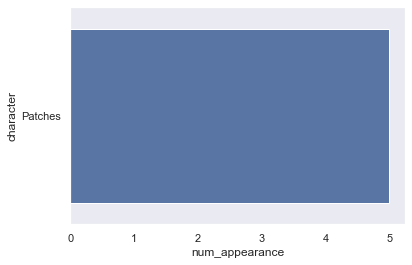

In [153]:
f = "num_appearance.mp4"
writer = animation.PillowWriter(fps=30)
animator.save(f, writer = writer)

In [104]:
posts.sort_values("created_date", ascending=True).head()

,index,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
40435,360349,byaeh0,2019-06-08,I hope this game uses From's usual voice actor...,1,TheHeroicOnion,1560015256,1560011656.0,https://www.reddit.com/r/Eldenring/comments/by...,I hope this game uses From's usual voice actor...,Sekiro's English dub is nowhere near as good a...,https://www.reddit.com/r/Eldenring/comments/by...,0
40433,360084,bztzwk,2019-06-12,Patches Who else thinks they will put trusty p...,6,animeboss642,1560360192,1560356592.0,https://www.reddit.com/r/Eldenring/comments/bz...,Patches,Who else thinks they will put trusty patches i...,https://www.reddit.com/r/Eldenring/comments/bz...,1
40432,360062,bzxflj,2019-06-13,"What the trailer shows us about Ragnarok, and ...",2,K2murphy,1560377048,1560373448.0,https://www.reddit.com/r/Eldenring/comments/bz...,"What the trailer shows us about Ragnarok, and ...",Let’s lay some groundwork here. We know that t...,https://www.reddit.com/r/Eldenring/comments/bz...,11
40431,360052,c00ws1,2019-06-13,Valkyrie-esc chick better be a new waifu,38,FlunderDunder,1560397375,1560393775.0,https://www.reddit.com/r/Eldenring/comments/c0...,Valkyrie-esc chick better be a new waifu,NaN,https://i.redd.it/i6ww9ecwo1431.jpg,14
40430,359965,c10ga9,2019-06-15,Eldenring wishlist! This is by no means a comp...,16,Transbian-swagger,1560623288,1560619688.0,https://www.reddit.com/r/Eldenring/comments/c1...,Eldenring wishlist!,This is by no means a complete list but with F...,https://www.reddit.com/r/Eldenring/comments/c1...,25


Data for animation

In [89]:
import numpy as np

CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "malenia", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]
ALIAS = {
    "ranni": ["ranni", "renna", "snow witch"],
    "malenia": ["valkyrie", "malenia"],
    "torrent": ["yakul", "torrent"],
    "alexandar": ["alexandar", "alexander"],
    "bloddy wolf": ["bloody wolf", "raging wolf"],
}

start_date = "2019-06-08"
end_date = "2022-03-29"
DATES = pd.date_range(start_date, end_date, freq="D").strftime('%Y-%m-%d').tolist() # get the list of dates

num_appearance = np.zeros((len(CHARACTERS), len(DATES)))

In [90]:
for row in posts.itertuples():
    for character in CHARACTERS:
        if character in ALIAS:
            for alias in ALIAS[character]:
                if keyword_match(row.contents, alias):
                    num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 3
        else:
            if keyword_match(row.contents, character):
                num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 3

for row in comments.itertuples():
    for character in CHARACTERS:
        if character in ALIAS:
            for alias in ALIAS[character]:
                if keyword_match(row.body, alias):
                    num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 1
        else:
            if keyword_match(row.body, character):
                num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 1



In [100]:
for i in range(len(CHARACTERS)):
    appearance = 0
    for j in range(len(DATES)):
        appearance += num_appearance[i, j]
        num_appearance[i, j] = appearance

num_appearance

array([[    0.,     0.,     0., ..., 39856., 39856., 39856.],
       [    0.,     0.,     0., ...,  5249.,  5249.,  5249.],
       [    0.,     0.,     0., ..., 13307., 13307., 13307.],
       ...,
       [    0.,     0.,     0., ...,  1591.,  1591.,  1591.],
       [    0.,     0.,     0., ...,  1000.,  1000.,  1000.],
       [    0.,     0.,     0., ...,  2110.,  2110.,  2110.]])

In [200]:
text = "text b c"
keyword = "b c"

def keyword_match(text, keyword):
    if keyword in text:
        text_subtracted = text.replace(keyword, "")
        if len(text_subtracted.split()) == len(text.split()) - len(keyword.split()):
            return True
    return False

keyword_match(text, keyword)

True

In [155]:
from typing import List
# freq = nlp(test).ents
# freq
# freq.most_common(10)

import pandas as pd

posts = pd.read_csv("posts_processed.csv")
sample = posts.query("created_date >= '2020-12-05' and created_date <= '2020-12-12'")

def entity_frequency_of_text(text: str) -> dict:
    """get the frequency of each entity in a text
    """
    freq = [str(entity) for entity in nlp(text).ents]
    return {entity:freq.count(entity) for entity in freq}


def entity_of_text(text: str) -> List:
    """get the unique entities in a text"""
    freq = set([str(entity) for entity in nlp(text).ents])
    return list(freq)

sample.head()


/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_7630/3742461862.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv("posts_processed.csv")


,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
335591,kbyxgc,2020-12-12,Jeff Grubb's journey with Elden Ring,1,fantalas,1607813732,https://i.redd.it/1t2hrn846u461.png,https://www.reddit.com/r/Eldenring/comments/kb...,Jeff Grubb's journey with Elden Ring,NaN,1.0,20
335592,kbyuco,2020-12-12,OOOOoooOOHHH,1,ownjer,1607813418,https://i.redd.it/p161kwi45u461.png,https://www.reddit.com/r/Eldenring/comments/kb...,OOOOoooOOHHH,NaN,1.0,4
335593,kbys4u,2020-12-12,OOOOOOOOOHHHH,1,AmericanBadazz69,1607813201,https://i.redd.it/skvjoful4u461.jpg,https://www.reddit.com/r/Eldenring/comments/kb...,OOOOOOOOOHHHH,NaN,1.0,0
335594,kbyo8o,2020-12-12,"When you’ve been disappointed at every turn, e...",1,Milesrah,1607812841,https://i.redd.it/8eimipaj3u461.jpg,https://www.reddit.com/r/Eldenring/comments/kb...,"When you’ve been disappointed at every turn, e...",NaN,1.0,5
335595,kbyis2,2020-12-12,If you need me I’ll be here waiting for a Stat...,1,marblerye69,1607812311,https://i.redd.it/0ejxhqly1u461.jpg,https://www.reddit.com/r/Eldenring/comments/kb...,If you need me I’ll be here waiting for a Stat...,NaN,1.0,3
